Open Weather Map - Data Analysis

Objective: Prove how the weather changes as we approach the Equator

Observed trends:

1) Maximum temperature is higher for cities with latitudes close to the Equator. It seems to get colder as the latitude approaches the North Pole than the South Pole, but this appreciation might be misleading as there are far mor human settlements close in the North Pole than in the South. Further analysis might be needed to prove this right for sure.

2) Wind speeds are on average higher in locations far from the Equator, but the trend is not as drastic as observed in the maximum temperatures results. 

3) Around the Equator cities have humidity levels over 60%. As we get far from this point, cities with lower humidity levels start appearing with higher frequency.

4) There was not observable trend relating cloudiness with latitude.


In [1]:
#Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import json
import requests
import random
import seaborn as sns
import numpy as np
from citipy import citipy
from key import api_key
from datetime import date


In [2]:
#Generate cities list

cities = []
i = 0

while i < 650:

    lat = round(random.uniform(-90,90),1)
    lon = round(random.uniform(-180,180),1)
   
    city = citipy.nearest_city(lat, lon)
    city = city.city_name
    city= city.replace(" ", "+")
    if city not in cities:
        cities.append(city)
        i = i+1

In [3]:
#Perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

Cloudiness=[]
Countries = []
Dates= []
Humidity= []
Latitude = []
Longitude = []
Max_Temps= []
Wind_Speeds = []

print("Beginning Data Retrieval")
print("-----------------------------------------------------------------")

j=0
erase = []
for city in cities:
    #Locks are used to prevent unfound cities from crashing the for loop
    url_city = url + "appid=" + api_key + "&q=" + city + "&units=" + units  
    weather_json = requests.get(url_city).json()
    if weather_json["cod"] == "404":
        j=j
        erase.append(cities.index(city))
    else:
        Cloudiness.append(weather_json["clouds"]["all"])
        Countries.append(weather_json["sys"]["country"])
        Dates.append(weather_json["dt"])
        Humidity.append(weather_json["main"]["humidity"])
        Latitude.append(weather_json["coord"]["lat"])
        Longitude.append(weather_json["coord"]["lon"])
        Max_Temps.append(weather_json["main"]["temp_max"])
        Wind_Speeds.append(weather_json["wind"]["speed"])  
        j=j+1
        print("Processing Record " + str(j) + " | " + city)
        print(url_city)

cities= np.delete(cities,erase).tolist()

Beginning Data Retrieval
-----------------------------------------------------------------
Processing Record 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=busselton&units=metric
Processing Record 2 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=mahebourg&units=metric
Processing Record 3 | ballina
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=ballina&units=metric
Processing Record 4 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=hobart&units=metric
Processing Record 5 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=thompson&units=metric
Processing Record 6 | castro
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=castro&units=metric
Processing Record 7 | talara
http://api.openweathermap.org/data/2.5/w

Processing Record 59 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=atbasar&units=metric
Processing Record 60 | kibre+mengist
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kibre+mengist&units=metric
Processing Record 61 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kaitangata&units=metric
Processing Record 62 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=camacha&units=metric
Processing Record 63 | ponta+do+sol
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=ponta+do+sol&units=metric
Processing Record 64 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=cidreira&units=metric
Processing Record 65 | ust-shonosha
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=ust-sh

Processing Record 116 | benghazi
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=benghazi&units=metric
Processing Record 117 | shimanovsk
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=shimanovsk&units=metric
Processing Record 118 | mana
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=mana&units=metric
Processing Record 119 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kavieng&units=metric
Processing Record 120 | elizabethton
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=elizabethton&units=metric
Processing Record 121 | kallaste
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kallaste&units=metric
Processing Record 122 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kahului&units=metric

Processing Record 174 | liberal
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=liberal&units=metric
Processing Record 175 | sioux+lookout
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=sioux+lookout&units=metric
Processing Record 176 | erzin
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=erzin&units=metric
Processing Record 177 | nadym
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=nadym&units=metric
Processing Record 178 | zlitan
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=zlitan&units=metric
Processing Record 179 | vostok
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=vostok&units=metric
Processing Record 180 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=itarema&units=metric
Processing Re

Processing Record 232 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=hamilton&units=metric
Processing Record 233 | kayes
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kayes&units=metric
Processing Record 234 | ballangen
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=ballangen&units=metric
Processing Record 235 | evensk
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=evensk&units=metric
Processing Record 236 | kuandian
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kuandian&units=metric
Processing Record 237 | jimo
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=jimo&units=metric
Processing Record 238 | khandyga
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=khandyga&units=metric
Processing Reco

Processing Record 290 | airai
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=airai&units=metric
Processing Record 291 | banjar
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=banjar&units=metric
Processing Record 292 | hami
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=hami&units=metric
Processing Record 293 | siniscola
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=siniscola&units=metric
Processing Record 294 | lewistown
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=lewistown&units=metric
Processing Record 295 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=klaksvik&units=metric
Processing Record 296 | kokopo
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kokopo&units=metric
Processing Record

Processing Record 349 | urla
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=urla&units=metric
Processing Record 350 | ponta+delgada
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=ponta+delgada&units=metric
Processing Record 351 | benguela
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=benguela&units=metric
Processing Record 352 | rengo
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=rengo&units=metric
Processing Record 353 | manyana
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=manyana&units=metric
Processing Record 354 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=paamiut&units=metric
Processing Record 355 | williston
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=williston&units=metric
Proce

Processing Record 407 | somerset+east
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=somerset+east&units=metric
Processing Record 408 | colesberg
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=colesberg&units=metric
Processing Record 409 | sokode
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=sokode&units=metric
Processing Record 410 | channel-port+aux+basques
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=channel-port+aux+basques&units=metric
Processing Record 411 | nyurba
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=nyurba&units=metric
Processing Record 412 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=verkhnevilyuysk&units=metric
Processing Record 413 | payson
http://api.openweathermap.org/data/2.5/weather?appid=87b66d98

Processing Record 465 | berlevag
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=berlevag&units=metric
Processing Record 466 | sunrise+manor
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=sunrise+manor&units=metric
Processing Record 467 | ossora
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=ossora&units=metric
Processing Record 468 | malinovoye+ozero
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=malinovoye+ozero&units=metric
Processing Record 469 | bakel
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=bakel&units=metric
Processing Record 470 | roma
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=roma&units=metric
Processing Record 471 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=baruun-urt&

Processing Record 522 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=ulaanbaatar&units=metric
Processing Record 523 | monrovia
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=monrovia&units=metric
Processing Record 524 | rio+gallegos
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=rio+gallegos&units=metric
Processing Record 525 | kaiyuan
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kaiyuan&units=metric
Processing Record 526 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=kulhudhuffushi&units=metric
Processing Record 527 | prince+george
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=prince+george&units=metric
Processing Record 528 | abalak
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e

Processing Record 580 | simbahan
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=simbahan&units=metric
Processing Record 581 | padang
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=padang&units=metric
Processing Record 582 | skoczow
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=skoczow&units=metric
Processing Record 583 | tsiroanomandidy
http://api.openweathermap.org/data/2.5/weather?appid=87b66d989ac427b8f1269b8e090cf9eb&q=tsiroanomandidy&units=metric


In [4]:
#Create Dataframe
#First create a dictionary
weather_dict = {
    "City" : cities,
    "Cloudiness" : Cloudiness,
    "Country": Countries,
    "Date" : Dates,
    "Humidity" : Humidity,
    "Lat" : Latitude,
    "Lng" : Longitude, 
    "Max Temp" : Max_Temps,
    "Wind Speed" : Wind_Speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("Weather_Data.csv")
weather_df.head()               


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,0,AU,1547167673,100,-33.64,115.35,17.89,2.61
1,mahebourg,40,MU,1547164800,88,-20.41,57.70,25.00,2.60
2,ballina,48,IE,1547167674,99,54.11,-9.15,4.66,1.41
3,hobart,40,AU,1547164800,46,-42.88,147.33,21.00,3.10
4,thompson,75,CA,1547164800,76,55.74,-97.86,-21.00,3.10


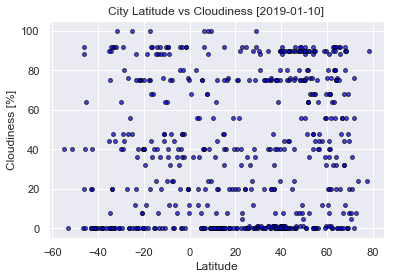

In [10]:
#Latitude vs Cloudiness Plot
x = Latitude
y = Cloudiness
colors = "blue"
area = 15

today = str(date.today())

sns.set()
plt.scatter(x, y, s=area, c=colors,edgecolors= "black", alpha=0.7)
plt.title("City Latitude vs Cloudiness " + "["+ today + "]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness [%]")

#Save Figure
plt.savefig("Cloudiness")

plt.show()

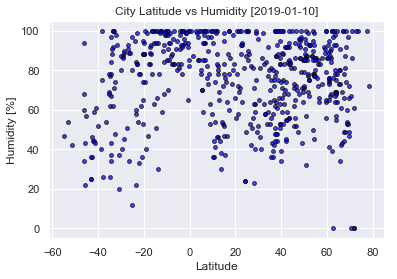

In [7]:
#Latitude vs Humidity Plot
x = Latitude
y = Humidity
colors = "blue"
area = 15

today = str(date.today())

sns.set()
plt.scatter(x, y, s=area, c=colors,edgecolors= "black", alpha=0.7)
plt.title("City Latitude vs Humidity " + "["+ today + "]")
plt.xlabel("Latitude")
plt.ylabel("Humidity [%]")

#Save Figure
plt.savefig("Humidity")

plt.show()

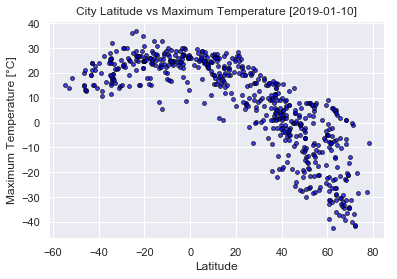

In [8]:
#Latitude vs Maximum Temperature
x = Latitude
y = Max_Temps
colors = "blue"
area = 15

today = str(date.today())

sns.set()
plt.scatter(x, y, s=area, c=colors,edgecolors= "black", alpha=0.7)
plt.title("City Latitude vs Maximum Temperature " + "["+ today + "]")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature [°C]")

#Save Figure
plt.savefig("MaxTemperature")

plt.show()

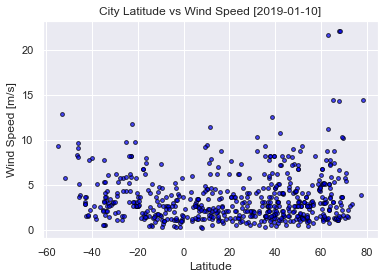

In [9]:
#Latitude vs Wind Speed Plot
x = Latitude
y = Wind_Speeds
colors = "blue"
area = 15

today = str(date.today())

sns.set()
plt.scatter(x, y, s=area, c=colors,edgecolors= "black", alpha=0.7)
plt.title("City Latitude vs Wind Speed " + "["+ today + "]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed [m/s]")

#Save Figure
plt.savefig("WindSpeed")

plt.show()